## TLDR

Sync times for Nodes:
- Lighthouse: 0 days 05:27:12
- Nimbus: 1 days 04:11:13.546000
- Prysm: 0 days 08:27:16
- Teku: 1 days 00:16:24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import datetime

sns.set()

### Initial dataset load + sanity check

In [2]:
df_lighthouse = pd.read_csv('./logs/lighthouse/cleaned_lighthouse_sync_log.csv')
df_lighthouse.head()

,datetime,est_time,speed,distance_in_slots,peers
0,Oct 07 23:45:38,4 hrs 44 mins,speed: 26.69 slots/sec,456091,peers: 16
1,Oct 07 23:45:50,4 hrs 44 mins,speed: 26.67 slots/sec,455836,peers: 15
2,Oct 07 23:46:02,3 hrs 57 mins,speed: 32.00 slots/sec,455325,peers: 22
3,Oct 07 23:46:14,4 hrs 44 mins,speed: 26.69 slots/sec,455070,peers: 20
4,Oct 07 23:46:26,4 hrs 44 mins,speed: 26.67 slots/sec,454815,peers: 19


In [3]:
df_nimbus = pd.read_csv('./logs/nimbus/cleaned_nimbus_sync_log.csv')
df_nimbus.head()

,ts,msg,scheduledSlot,peers,headEpoch,finalizedEpoch,slot
0,2020-10-10 00:07:08.001+00:00,Slot start,478535.0,6.0,13827.0,13824.0,NaN
1,2020-10-10 00:07:08.017+00:00,Slot end,NaN,NaN,13827.0,13824.0,478535.0
2,2020-10-10 00:07:09.764+00:00,"Syncing process is not progressing, reset the ...",NaN,NaN,NaN,NaN,NaN
3,2020-10-10 00:07:20.023+00:00,Slot start,478536.0,7.0,13827.0,13824.0,NaN
4,2020-10-10 00:07:20.032+00:00,Slot end,NaN,NaN,13827.0,13824.0,478536.0


In [4]:
df_prysm = pd.read_csv('./logs/prysm/cleaned_prysm_sync_log.csv')
df_prysm.head()

,activePeers,direction,level,msg,current_slot,max_slot,estimated_time_remaining,multiAddr,prefix,time,required,suitable,blocksPerSecond,peers,root,slot
0,3.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/206.189.196.155/tcp/9000/p2p/16Uiu2HAm2c7...,p2p,2020-10-07T14:11:03Z,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,info,Waiting for enough suitable peers before syncing,NaN,NaN,NaN,NaN,initial-sync,2020-10-07T14:11:07Z,3.0,1.0,NaN,NaN,NaN,NaN
2,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/159.203.165.140/tcp/9000/p2p/16Uiu2HAm6n5...,p2p,2020-10-07T14:11:08Z,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/3.132.193.49/tcp/9000/p2p/16Uiu2HAmDozn3k...,p2p,2020-10-07T14:11:08Z,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/101.179.14.213/tcp/9000/p2p/16Uiu2HAkyCHS...,p2p,2020-10-07T14:11:09Z,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_teku = pd.read_csv('./logs/teku/cleaned_teku_sync_log.csv')
df_teku.head()

,datetime,current_slot,head_slot,connected_peer
0,Oct-11 23:10:56,492654.0,46.0,7.0
1,Oct-11 23:11:08,492655.0,210.0,7.0
2,Oct-11 23:11:21,492656.0,352.0,6.0
3,Oct-11 23:11:32,492657.0,448.0,5.0
4,Oct-11 23:11:44,492658.0,576.0,4.0


### Lighthouse

In [6]:
df_lighthouse['datetime'] =  pd.to_datetime(('2020 ' + df_lighthouse['datetime']), format='%Y %b %d %H:%M:%S')
df_lighthouse.head()

,datetime,est_time,speed,distance_in_slots,peers
0,2020-10-07 23:45:38,4 hrs 44 mins,speed: 26.69 slots/sec,456091,peers: 16
1,2020-10-07 23:45:50,4 hrs 44 mins,speed: 26.67 slots/sec,455836,peers: 15
2,2020-10-07 23:46:02,3 hrs 57 mins,speed: 32.00 slots/sec,455325,peers: 22
3,2020-10-07 23:46:14,4 hrs 44 mins,speed: 26.69 slots/sec,455070,peers: 20
4,2020-10-07 23:46:26,4 hrs 44 mins,speed: 26.67 slots/sec,454815,peers: 19


In [7]:
df_lighthouse_parsed = df_lighthouse[df_lighthouse['est_time'].str.contains('mins')]
df_lighthouse_parsed.head()
df_lighthouse_parsed.shape

(1627, 5)

In [8]:
total_sync_time_lighthouse = df_lighthouse_parsed['datetime'].max() - df_lighthouse_parsed['datetime'].min()
print(total_sync_time_lighthouse)

0 days 05:27:12


In [9]:
##sanity check max time row
df_lighthouse_parsed[df_lighthouse_parsed['datetime'] == df_lighthouse_parsed['datetime'].max()]

,datetime,est_time,speed,distance_in_slots,peers
1633,2020-10-08 05:12:50,0 mins,speed: 15.96 slots/sec,161,peers: 26


In [10]:
##sanity check min time row
df_lighthouse_parsed[df_lighthouse_parsed['datetime'] == df_lighthouse_parsed['datetime'].min()]

,datetime,est_time,speed,distance_in_slots,peers
0,2020-10-07 23:45:38,4 hrs 44 mins,speed: 26.69 slots/sec,456091,peers: 16


In [11]:
df_lighthouse_parsed.loc[:,'distance_in_slots'] = pd.to_numeric(df_lighthouse_parsed.loc[:,'distance_in_slots'])
df_lighthouse_parsed['distance_in_slots'].min()

/Users/sidshekhar/opt/anaconda3/envs/datasci/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


161

<ipython-input-12-5f780e45770c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lighthouse_parsed['current_slot'] = df_lighthouse_parsed['distance_in_slots'].max() - df_lighthouse_parsed['distance_in_slots']
<ipython-input-12-5f780e45770c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lighthouse_parsed['time_elapsed'] = df_lighthouse_parsed['datetime'] - df_lighthouse_parsed['datetime'].min()


Text(0.5, 1.0, 'Lighthouse Sync Progress')

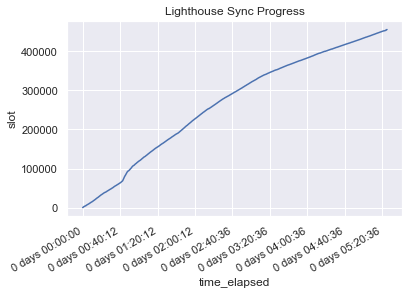

In [12]:
df_lighthouse_parsed['current_slot'] = df_lighthouse_parsed['distance_in_slots'].max() - df_lighthouse_parsed['distance_in_slots']
df_lighthouse_parsed['time_elapsed'] = df_lighthouse_parsed['datetime'] - df_lighthouse_parsed['datetime'].min()
df_lighthouse_parsed.plot(x='time_elapsed', y='current_slot', legend=False, ylabel='slot')
plt.title('Lighthouse Sync Progress')

### Nimbus

In [13]:
df_nimbus['ts'] =  pd.to_datetime(df_nimbus['ts'])
df_nimbus.head()

,ts,msg,scheduledSlot,peers,headEpoch,finalizedEpoch,slot
0,2020-10-10 00:07:08.001000+00:00,Slot start,478535.0,6.0,13827.0,13824.0,NaN
1,2020-10-10 00:07:08.017000+00:00,Slot end,NaN,NaN,13827.0,13824.0,478535.0
2,2020-10-10 00:07:09.764000+00:00,"Syncing process is not progressing, reset the ...",NaN,NaN,NaN,NaN,NaN
3,2020-10-10 00:07:20.023000+00:00,Slot start,478536.0,7.0,13827.0,13824.0,NaN
4,2020-10-10 00:07:20.032000+00:00,Slot end,NaN,NaN,13827.0,13824.0,478536.0


In [14]:
## Number of times syncing progress not progressing and queue had to be reset

df_nimbus[df_nimbus['msg'].str.contains('Syncing process is not progressing')].shape[0]


260

In [15]:
df_nimbus['ts'].max()

Timestamp('2020-10-10 04:17:57.546000+0000', tz='UTC')

In [16]:
df_nimbus['ts'].min()

Timestamp('2020-10-09 00:06:44+0000', tz='UTC')

In [17]:
total_sync_time_nimbus = df_nimbus['ts'].max() - df_nimbus['ts'].min()
print(total_sync_time_nimbus)

1 days 04:11:13.546000


In [18]:
# sanity check max time
df_nimbus[df_nimbus['ts'] == df_nimbus['ts'].max()]

,ts,msg,scheduledSlot,peers,headEpoch,finalizedEpoch,slot
2500,2020-10-10 04:17:57.546000+00:00,Slot end,NaN,NaN,NaN,NaN,NaN


In [19]:
# sanity check min time
df_nimbus[df_nimbus['ts'] == df_nimbus['ts'].min()]

,ts,msg,scheduledSlot,peers,headEpoch,finalizedEpoch,slot
15006,2020-10-09 00:06:44+00:00,Slot start,471333.0,3.0,0.0,0.0,NaN


Text(0.5, 1.0, 'Nimbus Sync Progress')

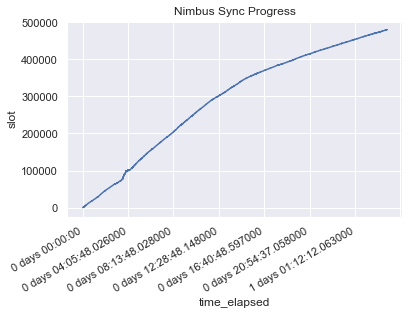

In [20]:
df_nimbus['current_slot'] = df_nimbus['headEpoch']*32
df_nimbus['time_elapsed'] = df_nimbus['ts'] - df_nimbus['ts'].min()
df_nimbus = df_nimbus.sort_values(by=['time_elapsed'])
df_nimbus.plot(x='time_elapsed', y='current_slot', legend=False, ylabel='slot')
plt.title('Nimbus Sync Progress')

### Prysm

In [21]:
df_prysm['time'] =  pd.to_datetime(df_prysm['time'])
df_prysm.head()

,activePeers,direction,level,msg,current_slot,max_slot,estimated_time_remaining,multiAddr,prefix,time,required,suitable,blocksPerSecond,peers,root,slot
0,3.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/206.189.196.155/tcp/9000/p2p/16Uiu2HAm2c7...,p2p,2020-10-07 14:11:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,info,Waiting for enough suitable peers before syncing,NaN,NaN,NaN,NaN,initial-sync,2020-10-07 14:11:07+00:00,3.0,1.0,NaN,NaN,NaN,NaN
2,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/159.203.165.140/tcp/9000/p2p/16Uiu2HAm6n5...,p2p,2020-10-07 14:11:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/3.132.193.49/tcp/9000/p2p/16Uiu2HAmDozn3k...,p2p,2020-10-07 14:11:08+00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2.0,info,Peer connected,NaN,NaN,NaN,/ip4/101.179.14.213/tcp/9000/p2p/16Uiu2HAkyCHS...,p2p,2020-10-07 14:11:09+00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df_prysm_parsed = df_prysm[df_prysm['msg'].str.contains('Processing block')]
df_prysm_parsed.head()

,activePeers,direction,level,msg,current_slot,max_slot,estimated_time_remaining,multiAddr,prefix,time,required,suitable,blocksPerSecond,peers,root,slot
10,NaN,NaN,info,Processing block batch of size 44 starting fro...,1.0,461155.0,58h13m35s,NaN,initial-sync,2020-10-07 14:11:19+00:00,NaN,NaN,2.2,9.0,NaN,NaN
12,NaN,NaN,info,Processing block batch of size 35 starting fro...,68.0,461156.0,32h25m31s,NaN,initial-sync,2020-10-07 14:11:23+00:00,NaN,NaN,4.0,10.0,NaN,NaN
13,NaN,NaN,info,Processing block batch of size 39 starting fro...,128.0,461156.0,21h42m20s,NaN,initial-sync,2020-10-07 14:11:26+00:00,NaN,NaN,5.9,10.0,NaN,NaN
14,NaN,NaN,info,Processing block batch of size 46 starting fro...,192.0,461156.0,15h36m55s,NaN,initial-sync,2020-10-07 14:11:30+00:00,NaN,NaN,8.2,10.0,NaN,NaN
17,NaN,NaN,info,Processing block batch of size 40 starting fro...,257.0,461157.0,12h33m6s,NaN,initial-sync,2020-10-07 14:11:33+00:00,NaN,NaN,10.2,12.0,NaN,NaN


In [23]:
df_prysm_parsed[df_prysm_parsed['time'] == df_prysm_parsed['time'].min()]

,activePeers,direction,level,msg,current_slot,max_slot,estimated_time_remaining,multiAddr,prefix,time,required,suitable,blocksPerSecond,peers,root,slot
10,NaN,NaN,info,Processing block batch of size 44 starting fro...,1.0,461155.0,58h13m35s,NaN,initial-sync,2020-10-07 14:11:19+00:00,NaN,NaN,2.2,9.0,NaN,NaN


In [24]:
df_prysm_parsed[df_prysm_parsed['time'] == df_prysm_parsed['time'].max()]

,activePeers,direction,level,msg,current_slot,max_slot,estimated_time_remaining,multiAddr,prefix,time,required,suitable,blocksPerSecond,peers,root,slot
9039,NaN,NaN,info,Processing block batch of size 46 starting fro...,463556.0,463692.0,14s,NaN,initial-sync,2020-10-07 22:38:35+00:00,NaN,NaN,9.2,32.0,NaN,NaN


In [25]:
total_sync_time_prysm = df_prysm_parsed['time'].max() - df_prysm_parsed['time'].min()
print(total_sync_time_prysm)

0 days 08:27:16


<ipython-input-26-7946190b199e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prysm_parsed['time_elapsed'] = df_prysm_parsed['time'] - df_prysm_parsed['time'].min()


Text(0.5, 1.0, 'Prysm Sync Progress')

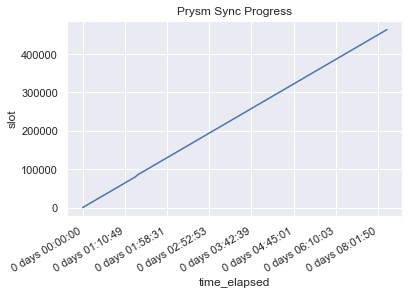

In [26]:
df_prysm_parsed['time_elapsed'] = df_prysm_parsed['time'] - df_prysm_parsed['time'].min()
df_prysm_parsed.plot(x='time_elapsed', y='current_slot', legend=False, ylabel='slot')
plt.title('Prysm Sync Progress')

## Teku

In [27]:
df_teku['datetime'] =  pd.to_datetime(('2020 ' + df_teku['datetime']), format='%Y %b-%d %H:%M:%S')
df_teku.head()


,datetime,current_slot,head_slot,connected_peer
0,2020-10-11 23:10:56,492654.0,46.0,7.0
1,2020-10-11 23:11:08,492655.0,210.0,7.0
2,2020-10-11 23:11:21,492656.0,352.0,6.0
3,2020-10-11 23:11:32,492657.0,448.0,5.0
4,2020-10-11 23:11:44,492658.0,576.0,4.0


In [28]:
df_teku[df_teku['datetime'] == df_teku['datetime'].max()]

,datetime,current_slot,head_slot,connected_peer
7283,2020-10-12 23:27:20,NaN,NaN,NaN


In [29]:
df_teku[df_teku['datetime'] == df_teku['datetime'].min()]

,datetime,current_slot,head_slot,connected_peer
0,2020-10-11 23:10:56,492654.0,46.0,7.0


In [30]:
total_sync_time_teku = df_teku['datetime'].max() - df_teku['datetime'].min()
print(total_sync_time_teku)

1 days 00:16:24


Text(0.5, 1.0, 'Teku Sync Progress')

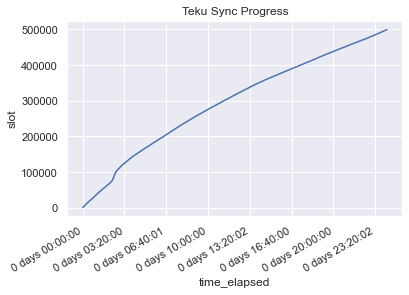

In [31]:
df_teku['time_elapsed'] = df_teku['datetime'] - df_teku['datetime'].min()
df_teku.plot(x='time_elapsed', y='head_slot', legend=False, ylabel='slot')
plt.title('Teku Sync Progress')

### Combined sync chart

In [32]:
#Lighthouse aggregated dataframe
df_lighthouse_parsed['lighthouse_sync_percentage'] = 100*(df_lighthouse_parsed['current_slot']/(df_lighthouse_parsed['current_slot'].max()))
df_lighthouse_parsed['seconds_elapsed'] = df_lighthouse_parsed['time_elapsed'].dt.total_seconds()
df_lighthouse_comp = df_lighthouse_parsed[['seconds_elapsed', 'lighthouse_sync_percentage']] 

#Nimbus aggregated dataframe
df_nimbus['nimbus_sync_percentage'] = 100*(df_nimbus['current_slot']/(df_nimbus['current_slot'].max()))
df_nimbus['seconds_elapsed'] = df_nimbus['time_elapsed'].dt.total_seconds()
df_nimbus_comp = df_nimbus[['seconds_elapsed','nimbus_sync_percentage']] 

#Prysm aggregated dataframe
df_prysm_parsed['prysm_sync_percentage'] = 100*(df_prysm_parsed['current_slot']/(df_prysm_parsed['current_slot'].max()))
df_prysm_parsed['seconds_elapsed'] = df_prysm_parsed['time_elapsed'].dt.total_seconds()
df_prysm_comp = df_prysm_parsed[['seconds_elapsed','prysm_sync_percentage']] 

#Teku aggregated dataframe
df_teku['teku_sync_percentage'] = 100*(df_teku['head_slot']/(df_teku['head_slot'].max()))
df_teku['seconds_elapsed'] = df_teku['time_elapsed'].dt.total_seconds()
df_teku_comp = df_teku[['seconds_elapsed','teku_sync_percentage']] 


#Combine all clients into one dataframe for metrics comparison
data_frames = [df_lighthouse_comp, df_nimbus_comp, df_prysm_comp, df_teku_comp]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['seconds_elapsed'],
                                            how='outer'), data_frames)


# df_merged.to_csv('combined_completion_perc.csv', index=False)  

# df_combined = pd.merge(df_combined_times, df_lighthouse_comp, on='time_elapsed', how='left')
# df_combined = pd.merge(df_combined, df_nimbus_comp, on='time_elapsed', how='left')
# df_combined = pd.merge(df_combined, df_prysm_comp, on='time_elapsed', how='left')
# df_combined = pd.merge(df_combined, df_teku_comp, on='time_elapsed', how='left')


# df_merged.sort_values(by=['time_elapsed'])
# df_merged.tail(1000)

df_merged.head(100)

<ipython-input-32-9dca9e503e79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lighthouse_parsed['lighthouse_sync_percentage'] = 100*(df_lighthouse_parsed['current_slot']/(df_lighthouse_parsed['current_slot'].max()))
<ipython-input-32-9dca9e503e79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lighthouse_parsed['seconds_elapsed'] = df_lighthouse_parsed['time_elapsed'].dt.total_seconds()
<ipython-input-32-9dca9e503e79>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,seconds_elapsed,lighthouse_sync_percentage,nimbus_sync_percentage,prysm_sync_percentage,teku_sync_percentage
0,0.0,0.000000,0.0,0.000216,0.009202
1,12.0,0.055930,NaN,NaN,0.042008
2,24.0,0.168008,NaN,NaN,NaN
3,36.0,0.223938,NaN,NaN,0.089617
4,48.0,0.279868,NaN,NaN,0.115222
...,...,...,...,...,...
95,1152.0,6.842936,NaN,NaN,NaN
96,1164.0,6.899085,NaN,NaN,2.266026
97,1176.0,7.011164,NaN,NaN,NaN
98,1188.0,7.067094,NaN,NaN,2.311034


Text(0.5, 1.0, 'Sync Progress Compared')

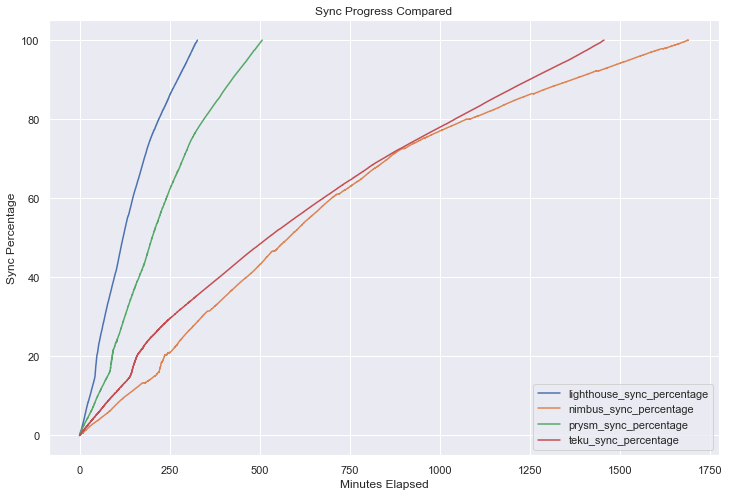

In [33]:
df_merged['minutes_elapsed'] = df_merged['seconds_elapsed']/60

df_merged.plot(x='minutes_elapsed', y=['lighthouse_sync_percentage', 'nimbus_sync_percentage', 'prysm_sync_percentage', 'teku_sync_percentage'], figsize=(12,8), xlabel='Minutes Elapsed', ylabel='Sync Percentage')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Sync Progress Compared')

In [35]:
df_merged.head()

,seconds_elapsed,lighthouse_sync_percentage,nimbus_sync_percentage,prysm_sync_percentage,teku_sync_percentage,minutes_elapsed
0,0.0,0.000000,0.0,0.000216,0.009202,0.0
1,12.0,0.055930,NaN,NaN,0.042008,0.2
2,24.0,0.168008,NaN,NaN,NaN,0.4
3,36.0,0.223938,NaN,NaN,0.089617,0.6
4,48.0,0.279868,NaN,NaN,0.115222,0.8


In [36]:
df_merged.to_csv('merged_nodes_performance.csv')